# Ships in Satellite Imagery
The dataset consists of image chips extracted from Planet satellite imagery collected over the San Franciso Bay area.
It includes 2800 80x80 RGB images labeled with either a "ship" or "no-ship" classification. 
Image chips were derived from PlanetScope full-frame visual scene products, which are orthorectified to a 3 meter pixel size. 

https://www.kaggle.com/rhammell/ships-in-satellite-imagery

In [1]:


import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from IPython.display import display

%matplotlib inline
sns.set()

In [4]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
from keras.models import load_model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.layers import  Input
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import pandas as pd
import gc
 


In [6]:
import json
f = open(r'./data/shipsnet.json')
dataset = json.load(f)
f.close()

In [7]:


input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')


In [8]:
x = input_data / 255.
x = input_data.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

print(x.shape)

(2800, 80, 80, 3)


[ 0.  1.]


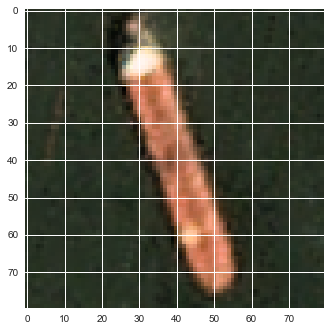

In [42]:
img_index = 0
im = x[img_index]

print(y[img_index])

plt.imshow(im)
plt.show()

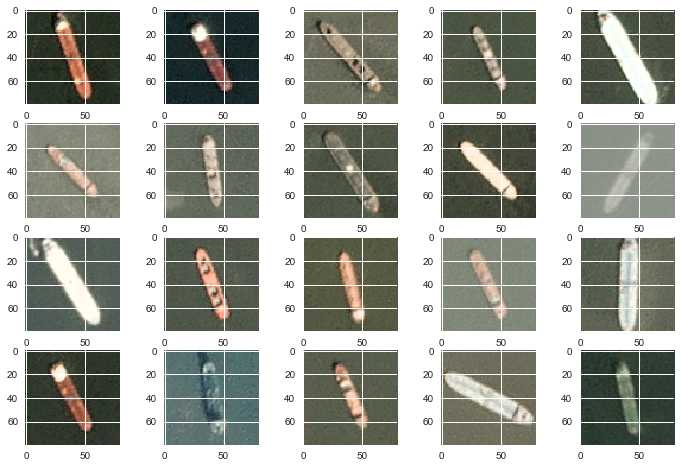

In [40]:
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x[i])

In [9]:
from keras.utils.np_utils import to_categorical

y = to_categorical(output_data, num_classes=2)
print(y.shape)


(2800, 2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F922FBC390>]], dtype=object)

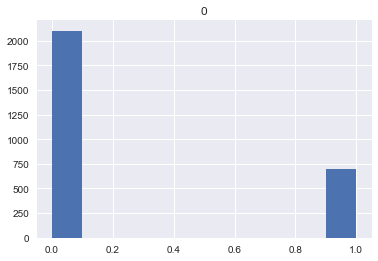

In [411]:

df = pd.DataFrame(output_data.reshape([-1]))
df.hist()


In [10]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
inp = Input(shape=(80, 80, 3))

In [12]:
import gc
gc.collect()

0

In [13]:
 
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.000001,
                              patience=10,
                              verbose=1, mode='auto')

In [11]:


np.random.seed(42)



In [19]:
model = Sequential()


model.add(Conv2D(124, (4, 4), strides=2,padding='same', input_shape=(80, 80, 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40 
model.add(Dropout(0.30))

model.add(Conv2D(124, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), strides=2, padding='same',  activation='relu'))  #input_shape=(80, 80, 3)
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20 
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3),strides=2, padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), strides=2, padding='same', activation='relu'))
model.add(Dropout(0.35))
model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.001, momentum=0.3, nesterov=True,decay=0.0001,clipnorm=1.)
model.compile(loss='categorical_crossentropy',
              optimizer= "adadelta",
              metrics=['accuracy'])

In [420]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 40, 40, 124)       6076      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 124)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 20, 124)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 124)       138508    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        31808     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 5, 64)          0         
__________

In [20]:
model.fit(
    x_train, 
    y_train,
    callbacks=[early_stopping],
    batch_size=32,
    epochs=64,
    validation_data=(x_test, y_test),
    validation_split=0.2,    
    verbose=1)


Train on 1876 samples, validate on 924 samples
Epoch 1/64
1876/1876 [==============================] - 46s 25ms/step - loss: 0.6171 - acc: 0.7297 - val_loss: 0.5779 - val_acc: 0.7457
Epoch 2/64
1876/1876 [==============================] - 45s 24ms/step - loss: 0.5542 - acc: 0.7511 - val_loss: 0.5202 - val_acc: 0.8149
Epoch 3/64
1876/1876 [==============================] - 48s 26ms/step - loss: 0.4468 - acc: 0.8097 - val_loss: 0.2993 - val_acc: 0.8766
Epoch 4/64
1876/1876 [==============================] - 49s 26ms/step - loss: 0.3194 - acc: 0.8849 - val_loss: 0.2792 - val_acc: 0.8853
Epoch 5/64
1876/1876 [==============================] - 48s 25ms/step - loss: 0.2991 - acc: 0.8939 - val_loss: 0.2465 - val_acc: 0.8842
Epoch 6/64
1876/1876 [==============================] - 48s 26ms/step - loss: 0.2613 - acc: 0.9003 - val_loss: 0.2183 - val_acc: 0.9058
Epoch 7/64
1876/1876 [==============================] - 46s 24ms/step - loss: 0.2405 - acc: 0.8998 - val_loss: 0.2211 - val_acc: 0.9015
E

променям оптимизиращата функция

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'])

In [23]:
model.fit(
    x_train, 
    y_train,
    callbacks=[early_stopping],
    batch_size=32,
    epochs=64,
    validation_data=(x_test, y_test),
    validation_split=0.2,    
    verbose=1)

Train on 1876 samples, validate on 924 samples
Epoch 1/64
1876/1876 [==============================] - 44s 24ms/step - loss: 0.2011 - acc: 0.9318 - val_loss: 0.2039 - val_acc: 0.9448
Epoch 2/64
1876/1876 [==============================] - 43s 23ms/step - loss: 0.1557 - acc: 0.9419 - val_loss: 0.1686 - val_acc: 0.9481
Epoch 3/64
1876/1876 [==============================] - 43s 23ms/step - loss: 0.1262 - acc: 0.9520 - val_loss: 0.1410 - val_acc: 0.9578
Epoch 4/64
1876/1876 [==============================] - 44s 23ms/step - loss: 0.1469 - acc: 0.9520 - val_loss: 0.1257 - val_acc: 0.9513
Epoch 5/64
1876/1876 [==============================] - 43s 23ms/step - loss: 0.1867 - acc: 0.9451 - val_loss: 0.1521 - val_acc: 0.9361
Epoch 6/64
1876/1876 [==============================] - 44s 23ms/step - loss: 0.1393 - acc: 0.9600 - val_loss: 0.1234 - val_acc: 0.9621
Epoch 7/64
1876/1876 [==============================] - 44s 23ms/step - loss: 0.1328 - acc: 0.9536 - val_loss: 0.1224 - val_acc: 0.9654
E

In [24]:
model.save('./model2.adam.h5')

Отново променям оптимизиращата функция

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer= "Adagrad",
              metrics=['accuracy'])

In [26]:
model.fit(
    x_train, 
    y_train,
    batch_size=32,
    epochs=32,
    validation_data=(x_test, y_test),
    validation_split=0.2,    
    verbose=1)

Train on 1876 samples, validate on 924 samples
Epoch 1/32
1876/1876 [==============================] - 46s 25ms/step - loss: 0.1387 - acc: 0.9627 - val_loss: 0.1119 - val_acc: 0.9729
Epoch 2/32
1876/1876 [==============================] - 49s 26ms/step - loss: 0.1686 - acc: 0.9536 - val_loss: 0.1091 - val_acc: 0.9675
Epoch 3/32
1876/1876 [==============================] - 45s 24ms/step - loss: 0.1219 - acc: 0.9638 - val_loss: 0.1007 - val_acc: 0.9784
Epoch 4/32
1876/1876 [==============================] - 45s 24ms/step - loss: 0.0865 - acc: 0.9776 - val_loss: 0.1046 - val_acc: 0.9621
Epoch 5/32
1876/1876 [==============================] - 44s 24ms/step - loss: 0.0948 - acc: 0.9696 - val_loss: 0.1162 - val_acc: 0.9665
Epoch 6/32
1876/1876 [==============================] - 47s 25ms/step - loss: 0.1962 - acc: 0.9360 - val_loss: 0.1192 - val_acc: 0.9632
Epoch 7/32
1876/1876 [==============================] - 45s 24ms/step - loss: 0.1497 - acc: 0.9494 - val_loss: 0.1198 - val_acc: 0.9654
E

In [27]:
model.save('./model2.adagrad.h5')

Тук разбрах че рекомилирането с друга оптимизираща функция не променя тежестите

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'])


In [32]:
model.fit(
    x_train, 
    y_train,
    batch_size=32,
    epochs=32,
    validation_data=(x_test, y_test),
    validation_split=0.2,    
    verbose=1)

Train on 1876 samples, validate on 924 samples
Epoch 1/32
1876/1876 [==============================] - 48s 25ms/step - loss: 0.0500 - acc: 0.9867 - val_loss: 0.1086 - val_acc: 0.9784
Epoch 2/32
1876/1876 [==============================] - 47s 25ms/step - loss: 0.0991 - acc: 0.9728 - val_loss: 0.1008 - val_acc: 0.9751
Epoch 3/32
1876/1876 [==============================] - 46s 24ms/step - loss: 0.0864 - acc: 0.9749 - val_loss: 0.1094 - val_acc: 0.9740
Epoch 4/32
1876/1876 [==============================] - 46s 24ms/step - loss: 0.0618 - acc: 0.9824 - val_loss: 0.1147 - val_acc: 0.9762
Epoch 5/32
1876/1876 [==============================] - 47s 25ms/step - loss: 0.0580 - acc: 0.9877 - val_loss: 0.1087 - val_acc: 0.9805
Epoch 6/32
1876/1876 [==============================] - 47s 25ms/step - loss: 0.1190 - acc: 0.9707 - val_loss: 0.0773 - val_acc: 0.9816
Epoch 7/32
1876/1876 [==============================] - 46s 24ms/step - loss: 0.1190 - acc: 0.9696 - val_loss: 0.1027 - val_acc: 0.9729
E

In [33]:
model.save('./model2.adam2.h5')

In [35]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=60,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [36]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=64)

Epoch 1/64
59/58 [==============================] - 42s 705ms/step - loss: 0.3965 - acc: 0.8619
Epoch 2/64
59/58 [==============================] - 44s 738ms/step - loss: 0.2167 - acc: 0.9211
Epoch 3/64
59/58 [==============================] - 47s 796ms/step - loss: 0.1986 - acc: 0.9276
Epoch 4/64
59/58 [==============================] - 45s 760ms/step - loss: 0.1992 - acc: 0.9258
Epoch 5/64
59/58 [==============================] - 47s 797ms/step - loss: 0.1877 - acc: 0.9298
Epoch 6/64
59/58 [==============================] - 48s 820ms/step - loss: 0.1842 - acc: 0.9268
Epoch 7/64
59/58 [==============================] - 47s 789ms/step - loss: 0.1614 - acc: 0.9435
Epoch 8/64
59/58 [==============================] - 47s 800ms/step - loss: 0.1902 - acc: 0.9324
Epoch 9/64
59/58 [==============================] - 43s 736ms/step - loss: 0.1765 - acc: 0.9351
Epoch 10/64
59/58 [==============================] - 42s 710ms/step - loss: 0.2566 - acc: 0.9014
Epoch 11/64
59/58 [====================

In [37]:
model.save('./model2.adam2.wIG.h5')

In [38]:
print("Train: " +str(model.evaluate(x_train,y_train,verbose=0)))
print("Test: " +str(model.evaluate(x_test,y_test,verbose=0)))
print("Whole dataset: " +str(model.evaluate(x,y,verbose=0)))

Train: [0.073982397511379042, 0.98240938166311298]
Test: [0.094319494271820237, 0.97835497835497831]
Whole dataset: [0.080693640473431777, 0.98107142857142859]


Намерих друг подобен датасет кой
https://www.kaggle.com/rhammell/planesnet

In [13]:
f = open(r'./data/planesnet.json')
planesnet = json.load(f)
f.close()
print(planesnet.keys())

dict_keys(['data', 'labels', 'locations', 'scene_ids'])


In [14]:
index = 2018 # Row to be saved
im = np.array(planesnet['data'][index]).astype('uint8').reshape((3, 400)).T.reshape((20,20,3))

print(im.shape)

(20, 20, 3)


In [15]:
len(planesnet['data'])

32000

In [16]:
import PIL
from PIL import Image, ImageDraw 

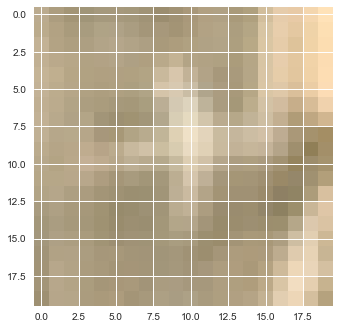

In [17]:
plt.imshow(im)

Скалираното изображение

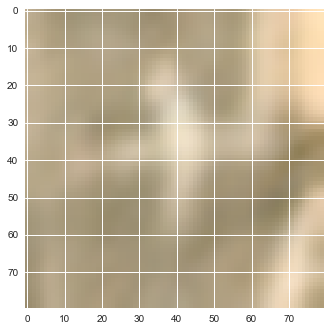

In [19]:
plt.imshow(PIL.Image.fromarray(im).resize([80,80],PIL.Image.ANTIALIAS))
plt.show()

In [129]:
upscaled = [ np.array(PIL.Image.fromarray(np.array(p).astype('uint8').reshape((3, 400)).T.reshape((20,20,3))).resize([80,80],PIL.Image.ANTIALIAS)) for p in planesnet['data'] ]

In [130]:
x_planes = np.array(upscaled)


In [131]:
x_planes.shape

(32000, 80, 80, 3)

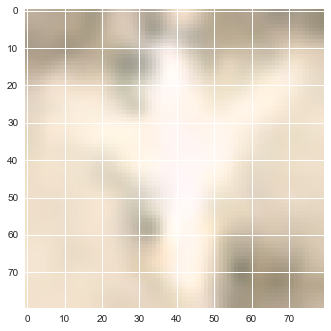

In [105]:

plt.imshow(x_planes[5])
plt.show()

In [108]:
y_planes = np.zeros((32000, 2))

In [114]:
model = load_model('./model2.adam2.wIG.h5')

In [137]:
model.fit(
    x_planes, 
    y_planes,
    batch_size=1,
    epochs=1,    
    validation_split=0.5,    
    verbose=1)

Train on 16000 samples, validate on 16000 samples
Epoch 1/1
16000/16000 [==============================] - 2516s 157ms/step - loss: 0.0000e+00 - acc: 0.9969 - val_loss: 0.0000e+00 - val_acc: 0.9992


In [143]:
 model.save('./model2.adam2.wIG.planes.h5')

подобрение

In [149]:
print("Train: " +str(model.evaluate(x_train,y_train,verbose=0)))
print("Test: " +str(model.evaluate(x_test,y_test,verbose=0)))
print("Whole dataset: " +str(model.evaluate(x,y,verbose=0)))

Train: [0.077139747684507737, 0.98454157782515994]
Test: [0.097844321716141394, 0.97943722943722944]
Whole dataset: [0.083972256447388122, 0.98285714285714287]


In [256]:
model.fit(
    x_planes, 
    y_planes,
    batch_size=8,
    epochs=32,    
    validation_split=0.2,    
    verbose=1)

Train on 25600 samples, validate on 6400 samples
Epoch 1/32
25600/25600 [==============================] - 708s 28ms/step - loss: 0.0000e+00 - acc: 0.9974 - val_loss: 0.0000e+00 - val_acc: 0.9986
Epoch 2/32
25600/25600 [==============================] - 634s 25ms/step - loss: 0.0000e+00 - acc: 0.9974 - val_loss: 0.0000e+00 - val_acc: 0.9986
Epoch 3/32
25600/25600 [==============================] - 586s 23ms/step - loss: 0.0000e+00 - acc: 0.9973 - val_loss: 0.0000e+00 - val_acc: 0.9986
Epoch 4/32
25600/25600 [==============================] - 565s 22ms/step - loss: 0.0000e+00 - acc: 0.9973 - val_loss: 0.0000e+00 - val_acc: 0.9986
Epoch 5/32
25600/25600 [==============================] - 562s 22ms/step - loss: 0.0000e+00 - acc: 0.9977 - val_loss: 0.0000e+00 - val_acc: 0.9986
Epoch 6/32
25600/25600 [==============================] - 560s 22ms/step - loss: 0.0000e+00 - acc: 0.9970 - val_loss: 0.0000e+00 - val_acc: 0.9986
Epoch 7/32
25600/25600 [==============================] - 558s 22ms/s

In [257]:
 model.save('./model2.adam2.wIG.planes2.h5')

In [261]:
print("Train: " +str(model.evaluate(x_train,y_train,verbose=0)))
print("Test: " +str(model.evaluate(x_test,y_test,verbose=0)))
print("Whole dataset: " +str(model.evaluate(x,y,verbose=0)))

Train: [0.077139747684507737, 0.98454157782515994]
Test: [0.097844321716141394, 0.97943722943722944]
Whole dataset: [0.083972256447388122, 0.98285714285714287]


In [133]:
predictions = model.predict(x_train)

In [124]:
def find_correct(prediction,label):
    if label[0] == 1:
        return prediction[0]>prediction[1]
    else:
        return prediction[0]<prediction[1]

In [125]:
y_train[177]

array([ 0.,  1.])

In [409]:
predictions[177]

array([ 0.07871769,  0.92128229], dtype=float32)

In [134]:
find_correct(predictions[177],y_train[177])

True

In [135]:
mistakes = [ i for i in range(len(x_train)) if not find_correct(predictions[i],y_train[i]) ]

Нека видим къде са грешките.

Случайно избрах 864 но label-а му очевидно е грешен, защото на мен това ми изглежда като кораб

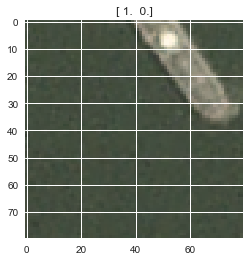

In [408]:
img_index = 864 

im = x_train[img_index]
 

plt.imshow(im)
plt.title(str(y_train[img_index]))

Разминаванията на нашия модел са: 

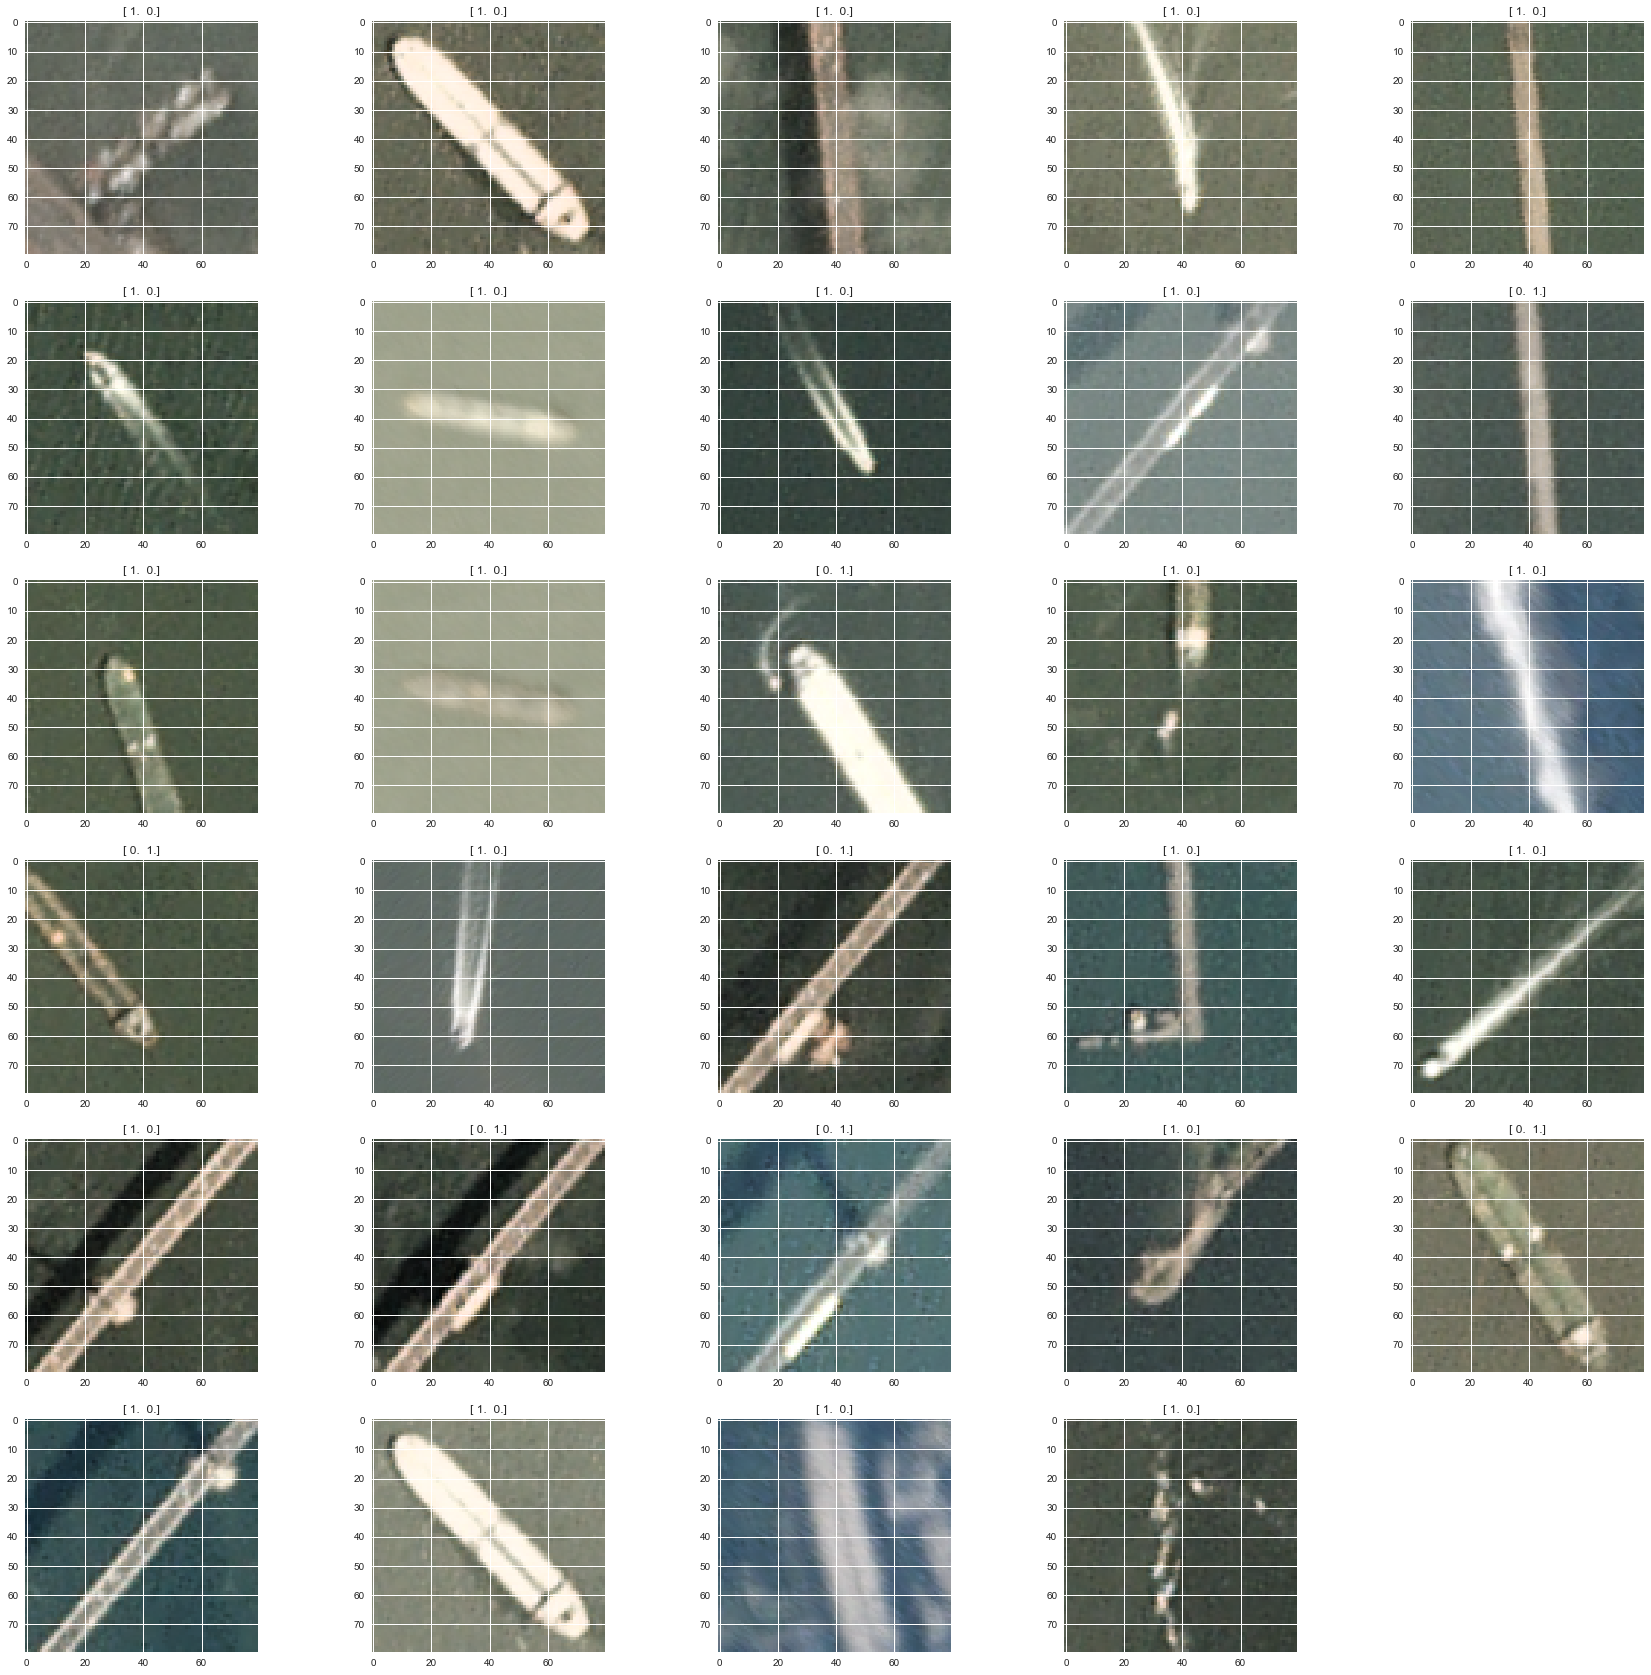

In [82]:
plt.figure(figsize=(30,30))
columns = 5
for i, image in enumerate(mistakes):
    plt.subplot(len(mistakes) / columns + 1, columns, i + 1)
    plt.imshow(x_train[mistakes[i]])
    plt.title(str(y_train[i]))

## Нека се научим от грешките. 

In [138]:
x_tmistakes= np.array([x_train[i] for i in mistakes ])
y_tmistakes= np.array([y_train[i] for i in mistakes ])

In [139]:
y_tmistakes.shape

(29, 2)

In [98]:
model.fit(
    x_tmistakes, 
    y_tmistakes,
    
    epochs=128,    
    validation_split=0.2,    
    verbose=1)

Train on 23 samples, validate on 6 samples
Epoch 1/128
23/23 [==============================] - 1s 49ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 2/128
23/23 [==============================] - 1s 50ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 3/128
23/23 [==============================] - 1s 43ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 4/128
23/23 [==============================] - 1s 47ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 5/128
23/23 [==============================] - 1s 43ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 6/128
23/23 [==============================] - 1s 42ms/step - loss: 1.9270 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 7/128
23/23 [==============================] - 1s 47ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 8/128
23/23 [==============

Epoch 63/128
23/23 [==============================] - 1s 44ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 64/128
23/23 [==============================] - 1s 41ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 65/128
23/23 [==============================] - 1s 40ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 66/128
23/23 [==============================] - 1s 50ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 67/128
23/23 [==============================] - 1s 43ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 68/128
23/23 [==============================] - 1s 43ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 69/128
23/23 [==============================] - 1s 49ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 70/128
23/23 [==============================] - 1s 46ms/step - 

Epoch 125/128
23/23 [==============================] - 1s 56ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 126/128
23/23 [==============================] - 1s 44ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 127/128
23/23 [==============================] - 1s 45ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 128/128
23/23 [==============================] - 1s 47ms/step - loss: 2.1024 - acc: 0.8696 - val_loss: 5.3727 - val_acc: 0.6667


###  Вижда се,  че вместо да оверфитне на разминаващите данни модела напълно се разваля.
### Може да се направи заключение разминаващите данни противоречът на останалите в dataset - a

In [99]:
print("Train: " +str(model.evaluate(x_train,y_train,verbose=0)))
print("Test: " +str(model.evaluate(x_test,y_test,verbose=0)))
print("Whole dataset: " +str(model.evaluate(x,y,verbose=0)))

Train: [3.9951569657844268, 0.75213219641622453]
Test: [4.0992991697220571, 0.74567099644508195]
Whole dataset: [4.0295239612041485, 0.75]


In [131]:
 model.save('./model2.onMisstakes.h5')